In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#grabbing cleaned state data from Repo
allbystate_path = "../George/Resources/AllByState-Daily.csv"
allbystate_df = pd.read_csv(allbystate_path)
allbystate_df

dates = ['2020-01-01', '2020-01-15', '2020-02-01', '2020-02-15',
         '2020-03-01', '2020-03-15', '2020-04-01', '2020-04-15',
         '2020-05-01', '2020-05-15', '2020-06-01', '2020-06-15',
         '2020-07-01', '2020-07-15', ]

In [3]:
#setting variable for date to replicate plots and calculations below for dates in series
date = pd.to_datetime(allbystate_df['Date']).max().date()
date_snapshot = allbystate_df.loc[allbystate_df["Date"]==str(date),:]
date_snapshot

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
134,2174,2193,2020-07-23,19,0.0087,0,Alaska,AK,62,62,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
270,149881,152944,2020-07-23,3063,0.0200,0,Arizona,AZ,2246,2335,89,0,33.7298,-111.4312,89709.56,6940873.0,77.370494,29270.505603,49063.0
406,35873,36259,2020-07-23,386,0.0106,0,Arkansas,AR,1007,1013,6,0,34.9697,-92.3731,49590.60,2977621.0,60.044061,25666.556534,40574.0
542,422572,430773,2020-07-23,8201,0.0190,0,California,CA,9333,9487,154,0,36.1162,-119.6816,96922.44,39076841.0,403.176406,35049.472573,65231.0
678,40509,42295,2020-07-23,1786,0.0422,0,Colorado,CO,600,615,15,0,39.0598,-105.3111,97067.89,5514222.0,56.807890,36469.426840,59610.5
814,43822,48232,2020-07-23,4410,0.0914,0,Connecticut,CT,5,9,4,0,41.5978,-72.7554,4829.57,3569498.0,739.092300,43172.210523,86324.0
950,13395,13924,2020-07-23,529,0.0380,0,Delaware,DE,130,132,2,0,39.3185,-75.5071,1945.37,943604.0,485.051173,34155.262572,61657.0
1086,384350,389868,2020-07-23,5518,0.0142,0,Florida,FL,10076,10249,173,0,27.7663,-81.6868,43794.02,20568602.0,469.666909,30222.615661,51245.5
1222,153246,156607,2020-07-23,3361,0.0215,0,Georgia,GA,4279,4305,26,0,33.0406,-83.6431,54620.06,10269257.0,188.012554,29577.560409,45659.5
1358,1464,1490,2020-07-23,26,0.0174,0,Hawaii,HI,54,55,1,0,21.0943,-157.4983,5407.11,1413437.0,261.403411,34068.340484,72647.0


In [4]:
#statistical summary for the Deaths on a given Date
date_total_deaths = date_snapshot["Deaths"].sum()
date_mean = date_snapshot["Deaths"].mean()
date_median = date_snapshot["Deaths"].median()
date_variance = date_snapshot["Deaths"].var(ddof=0)
date_std = date_snapshot["Deaths"].std(ddof=0)
date_sem = date_snapshot["Deaths"].sem()

#calculating outliers
quartiles = date_snapshot["Deaths"].quantile([.25,0.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f" The total deaths related to Covid-19 across the U.S. on {date} is {date_total_deaths}")
print(f" The average deaths across the U.S. on {date} is {date_mean}")
print(f" The median deaths across the U.S. on {date} is {date_median}")
print(f" The variance of deaths across the U.S. on {date} is {round(date_variance,2)}")
print(f" The standard deviation deaths across the U.S. on {date} is {round(date_std,2)}")
print(f" The standard error of the mean of deaths across the U.S. on {date} is {round(date_sem,2)}")
print(f" The lower bound of deaths that may indicate outliers is {round(lower_bound,2)}")
print(f" The upper bound of deaths that may indicate outliers is {round(upper_bound,2)}")


 The total deaths related to Covid-19 across the U.S. on 2020-07-23 is 143518
 The average deaths across the U.S. on 2020-07-23 is 2870.36
 The median deaths across the U.S. on 2020-07-23 is 1095.0
 The variance of deaths across the U.S. on 2020-07-23 is 26980117.35
 The standard deviation deaths across the U.S. on 2020-07-23 is 5194.24
 The standard error of the mean of deaths across the U.S. on 2020-07-23 is 742.03
 The lower bound of deaths that may indicate outliers is -4208.38
 The upper bound of deaths that may indicate outliers is 7860.62


y = 0.14x + -4714.59
The correlation between Median Household Income & Covid-19 Deaths as of 2020-07-23 is 0.31


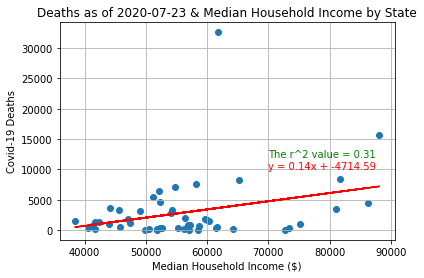

In [26]:
#Creating Scatterplot & calculating correlation of latest Coronavirus Death data to plot with Median Household Income
snapshot_df = date_snapshot[["Date", "Deaths", "State","Median Household Income", "Per Capita Income"]]
snapshot_df

deaths = snapshot_df["Deaths"]
median_hi = snapshot_df["Median Household Income"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(median_hi, deaths)
regress_values = median_hi * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(median_hi, deaths)
plt.plot(median_hi, regress_values, 'r-')
plt.annotate(line_eq, (70000,10000), fontsize=10, color='red')
plt.xlabel("Median Household Income ($)")
plt.ylabel(f"Covid-19 Deaths")
plt.title(f"Deaths as of {date} & Median Household Income by State")
plt.grid(True)

correlation = st.pearsonr(median_hi, deaths)
corr = (f"The r^2 value = {round(correlation[0],2)}")
plt.annotate(corr, (70000,12000),fontsize=10, color="green")
print(line_eq)
print(f"The correlation between Median Household Income & Covid-19 Deaths as of {date} is {round(correlation[0],2)}")
plt.savefig("Covid_Deaths_and_Median_Income_Plot.png")
plt.show()

The correlation between Per Capita Income & Covid-19 Deaths as of 2020-07-23 is 0.38


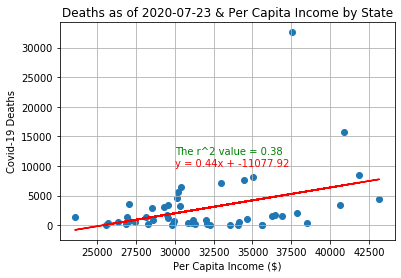

In [28]:
#scatterplot & corrrelation of deaths but with per capita income
deaths = snapshot_df["Deaths"]
per_cap = snapshot_df["Per Capita Income"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(per_cap, deaths)
regress_values = per_cap * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(per_cap, deaths)
plt.plot(per_cap, regress_values, 'r-')
plt.annotate(line_eq, (30000,10000), fontsize=10, color='red')
plt.xlabel("Per Capita Income ($)")
plt.ylabel(f"Covid-19 Deaths")
plt.title(f"Deaths as of {date} & Per Capita Income by State")
plt.grid(True)
correlation = st.pearsonr(per_cap, deaths)
corr = (f"The r^2 value = {round(correlation[0],2)}")
plt.annotate(corr, (30000, 12000), fontsize=10, color='green')
print(f"The correlation between Per Capita Income & Covid-19 Deaths as of {date} is {round(correlation[0],2)}")
plt.savefig("Covid_Deaths_And_Per_Cap_Income_Plot.png")
plt.show()

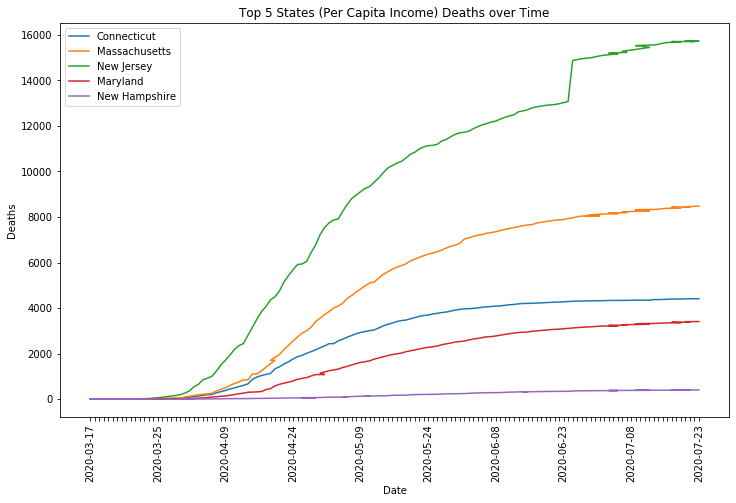

In [9]:
top_deaths = allbystate_df.sort_values(["Deaths"], ascending=True)
ct_df = top_deaths[top_deaths["State"]=='CT']
ma_df = top_deaths[top_deaths["State"]=='MA']
nj_df = top_deaths[top_deaths["State"]=='NJ']
md_df = top_deaths[top_deaths["State"]=='MD']
nh_df = top_deaths[top_deaths["State"]=='NH']

fig,ax = plt.subplots()
plt.plot("Date", "Deaths", data=ct_df)
plt.plot("Date", "Deaths", data=ma_df)
plt.plot("Date", "Deaths", data=nj_df)
plt.plot("Date", "Deaths", data=md_df)
plt.plot("Date", "Deaths", data=nh_df)
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title("Top 5 States (Per Capita Income) Deaths over Time")
plt.xticks(rotation=90)
fig.set_size_inches(12, 7.25)
plt.legend(labels=["Connecticut", "Massachusetts", "New Jersey", "Maryland", "New Hampshire"])

for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 15 !=0:
        label.set_visible(False)
plt.savefig("Top 5 States Per Capita Income Total Deaths over Time.png")
plt.show()

In [10]:
allbystate_df.head()

,Active,Confirmed,Date,Deaths,Fatality Rate,Recovered,State Name,State,Active Diff,Confirmed Diff,Deaths Diff,Recovered Diff,Lat,Lon,Land Area (mi2),Population,Population Density,Per Capita Income,Median Household Income
0,0,0,2020-03-10,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
1,0,0,2020-03-11,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
2,0,0,2020-03-12,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
3,1,1,2020-03-13,0,0.0,0,Alaska,AK,1,1,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0
4,1,1,2020-03-15,0,0.0,0,Alaska,AK,0,0,0,0,61.3707,-152.4044,211300.81,734417.0,3.475694,35617.249121,51875.0


In [26]:
allbystate_df["Standard Moving Average"] = allbystate_df.loc[:,"Deaths Diff"].rolling(window=7).mean()
allbystate_df

array(['AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
       'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT',
       'VA', 'WA', 'WV', 'WI', 'WY', 'AL'], dtype=object)

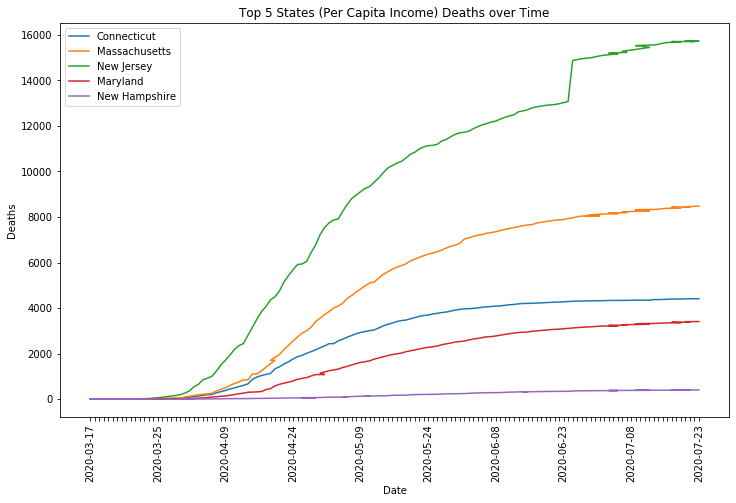

In [30]:
moving_average = allbystate_df.sort_values(["Date"], ascending=True)
ct_df = top_deaths[top_deaths["State"]=='CT']
ma_df = top_deaths[top_deaths["State"]=='MA']
nj_df = top_deaths[top_deaths["State"]=='NJ']
md_df = top_deaths[top_deaths["State"]=='MD']
nh_df = top_deaths[top_deaths["State"]=='NH']

fig,ax = plt.subplots()
plt.plot("Date", "Deaths", data=ct_df)
plt.plot("Date", "Deaths", data=ma_df)
plt.plot("Date", "Deaths", data=nj_df)
plt.plot("Date", "Deaths", data=md_df)
plt.plot("Date", "Deaths", data=nh_df)
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.title("Top 5 States (Per Capita Income) Deaths over Time")
plt.xticks(rotation=90)
fig.set_size_inches(12, 7.25)
plt.legend(labels=["Connecticut", "Massachusetts", "New Jersey", "Maryland", "New Hampshire"])

for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 15 !=0:
        label.set_visible(False)
plt.savefig("Top 5 States Per Capita Income Total Deaths over Time.png")
plt.show()